In [1]:
import os, sys
import pyxdf as xdf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random
import scipy as sp
from scipy import stats
import statistics as st

from collections import Counter


markers_path = "C:\\Users\\USUARIO\\Documents\\Pompeu Fabra\\Analyzing EEG\\EEG_recordings\\Markers\\"

arm_logs_path = "C:\\Users\\USUARIO\\Documents\\Pompeu Fabra\\Analyzing EEG\\"

In [2]:
pathlist = ["ArmConGroup\\Anna S\\Day 1\\log_arms.csv", "ArmConGroup\\Anna S\\Day 2\\log_arms.csv",
            "ArmConGroup\\Emily\\Day 1\\log_arms.csv", "ArmConGroup\\Emily\\Day 2\\log_arms.csv",
            "ArmConGroup\\Joseba\\Day 1\\log_arms.csv", "ArmConGroup\\Joseba\\Day 2\\log_arms.csv",
            "ArmConGroup\\Yao\\Day 1\\log_arms.csv", "ArmConGroup\\Yao\\Day 2\\log_arms.csv",             
            "ArmExpGroup\\Anna B\\Day 1\\log_arms.csv", "ArmExpGroup\\Anna B\\Day 2\\log_arms.csv",
            "ArmExpGroup\\Anna G\\Day 1\\log_arms.csv", "ArmExpGroup\\Anna G\\Day 2\\log_arms.csv",
            "ArmExpGroup\\Dimi\\Day 1\\log_arms.csv", "ArmExpGroup\\Dimi\\Day 2\\log_arms.csv",
            "ArmExpGroup\\Natasha\\Day 1\\log_arms.csv", "ArmExpGroup\\Natasha\\Day 2\log_arms.csv"]  

def get_name(path):
    el = path.split("\\")
    eln = [i for i in el if i not in ("", "ArmExpGroup","ArmConGroup", "log_arms.csv")]
    return eln

In [3]:
subjectdictplots = {"Anna S": "Con1", "Emily" :"Con2", "Joseba": "Con3", "Yao": "Con4","Anna B": "Exp1",
               "Anna G": "Exp2","Dimi": "Exp3", "Natasha": "Exp4"}


def d_samples(pathlist):
    distancedict = {}
    for file in pathlist:
        name = get_name(file)[0]
        day = get_name(file)[1]
        nameday = (subjectdictplots[name], day)
        logarms = pd.read_csv(arm_logs_path + file, header=None, index_col=False)
        arm_movements = list(logarms[0])
        timer = list(logarms[1])
        distance = list(map(lambda x2, x1: abs(abs(x2) - abs(x1)), arm_movements [1::2], arm_movements[::2]))
        time_taken = timer[1::2]


   
        distancedict[nameday] = distance
    
    return distancedict

ddict = d_samples(pathlist)

In [4]:
subjectlist = []
daylist = []

for key in ddict:
    for i in range(len(ddict[key])):
        subjectlist.append(key[0])
        daylist.append(key[1])

dislist = []
        
for key in ddict:
    dislist.extend(ddict[key])
    
    
#ddict.keys()

In [5]:
dist_exp_1_1 = ddict.get(('Exp1', 'Day 1'))
dist_exp_1_2 = ddict.get(('Exp1', 'Day 2'))
dist_exp_2_1 = ddict.get(('Exp2', 'Day 1'))
dist_exp_2_2 = ddict.get(('Exp2', 'Day 2'))
dist_exp_3_1 = ddict.get(('Exp3', 'Day 1')) 
dist_exp_3_2 = ddict.get(('Exp3', 'Day 2'))
dist_exp_4_1 = ddict.get(('Exp4', 'Day 1'))
dist_exp_4_2 = ddict.get(('Exp4', 'Day 2'))
dist_con_1_1 = ddict.get(('Con1', 'Day 1'))
dist_con_1_2 = ddict.get(('Con1', 'Day 2'))
dist_con_2_1 = ddict.get(('Con2', 'Day 1'))
dist_con_2_2 = ddict.get(('Con2', 'Day 2'))
dist_con_3_1 = ddict.get(('Con3', 'Day 1'))
dist_con_3_2 = ddict.get(('Con3', 'Day 2'))
dist_con_4_1 = ddict.get(('Con4', 'Day 1'))
dist_con_4_2 = ddict.get(('Con4', 'Day 2'))   

exp1_dist_median = [st.median(dist_exp_1_1), st.median(dist_exp_2_1), st.median(dist_exp_3_1), st.median(dist_exp_4_1)]

exp2_dist_median = [st.median(dist_exp_1_2), st.median(dist_exp_2_2), st.median(dist_exp_3_2), st.median(dist_exp_4_2)] 

con1_dist_median = [st.median(dist_con_1_1), st.median(dist_con_2_1), st.median(dist_con_3_1), st.median(dist_con_4_1)]

con2_dist_median = [st.median(dist_con_1_2), st.median(dist_con_2_2), st.median(dist_con_3_2), st.median(dist_con_4_2)]


In [6]:
# normalizing samples to 15302

len(dist_exp_4_1) #15302 len(dist_exp_1_1) #16119   16119 - 15302 = 817

fixed_dist_exp_1_1 = dist_exp_1_1[408:15711]

fixed_dist_exp_2_1 = dist_exp_2_1[116:15819]

fixed_dist_exp_3_1 = dist_exp_3_1[774:16076] #16851

fixed_dist_exp_4_1 = dist_exp_4_1

#fixed_dist_allexp = list(map(lambda *l: l, fixed_dist_exp_1_1, fixed_dist_exp_2_1, fixed_dist_exp_3_1, fixed_dist_exp_4_1))

#len(fixed_dist_allexp) # 15302

fixed_dist_allexp1 = fixed_dist_exp_1_1 + fixed_dist_exp_2_1 + fixed_dist_exp_3_1 + fixed_dist_exp_4_1

len(fixed_dist_allexp1)# 61610//4 = 15402

fixed_dist_allexp1 = fixed_dist_allexp1[1683:59927]

# normalizing samples to 14561

len(dist_exp_2_2) # 14561

fixed_dist_exp_1_2 = dist_exp_1_2[692:15253]# 15945 - 14561 = 1384

fixed_dist_exp_3_2 = dist_exp_3_2[680:15241] # 15920 - 14561 = 1359

fixed_dist_exp_4_2 = dist_exp_4_2[333:14894] # 15226 - 14561 = 665

fixed_dist_exp_2_2 = dist_exp_2_2

fixed_dist_allexp2 = fixed_dist_exp_1_2 + fixed_dist_exp_2_2 + fixed_dist_exp_3_2 + fixed_dist_exp_4_2

len(fixed_dist_allexp2)# 58244 // 4 = 14561

len(fixed_dist_allexp1)

#sp.stats.wilcoxon(fixed_dist_allexp1, fixed_dist_allexp2) # p = 7.561388886032573e-36
sp.stats.mannwhitneyu(fixed_dist_allexp1, fixed_dist_allexp2) # 2.3856735708820914e-25

MannwhitneyuResult(statistic=1636866691.0, pvalue=2.3856735708820914e-25)

In [7]:
len(dist_con_1_1) # 13940

fixed_dist_con_2_1 = dist_con_2_1[88:14028]  # 14116 - 13940 = 176

fixed_dist_con_3_1 = dist_con_3_1[392:14332]  # 14724 - 13940 = 784

fixed_dist_con_4_1 = dist_con_4_1[389:14329]  # 14718 - 13940 = 778

fixed_dist_con_1_1 = dist_con_1_1


fixed_dist_allcon1 = fixed_dist_con_1_1 + fixed_dist_con_2_1 + fixed_dist_con_3_1 + fixed_dist_con_4_1 # 55760 / 4 = 13940


len(dist_con_4_2) # 14056

fixed_dist_con_1_2 = dist_con_1_2[73:]

fixed_dist_con_2_2 = dist_con_2_2[396:14452]  # 14849 - 14056 = 793

fixed_dist_con_3_2 = dist_con_3_2[627:14683] # 15309 - 14056 = 1253

fixed_dist_con_4_2 = dist_con_4_2

fixed_dist_allcon2 = fixed_dist_con_1_2 + fixed_dist_con_2_2 + fixed_dist_con_3_2 + fixed_dist_con_4_2 # 56224

fixed_dist_allcon2 = fixed_dist_allcon2[232:55992]

#sp.stats.wilcoxon(fixed_dist_allcon1, fixed_dist_allcon2) # pvalue=2.3638416704811126e-258

sp.stats.mannwhitneyu(fixed_dist_allcon1, fixed_dist_allcon2) # pvalue=9.921377539014482e-254

MannwhitneyuResult(statistic=1371917737.5, pvalue=9.921377539014482e-254)

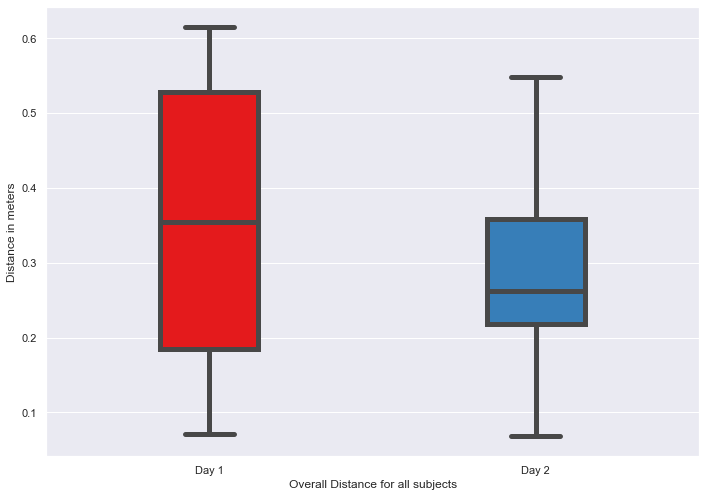

In [26]:
# check for normality per data set
#sp.stats.shapiro(con1_dist_median)

overall_median_day1 = exp1_dist_median + con1_dist_median

overall_median_day2 = exp2_dist_median + con2_dist_median

overall_day1_series = pd.Series(np.array(overall_median_day1)*1000, name="Day 1")
overall_day2_series = pd.Series(np.array(overall_median_day2)*1000, name="Day 2")
overall_df = pd.concat([overall_day1_series, overall_day2_series], axis=1)

errors = [0.5, 0.25, 0.75]

sns.set(rc={'figure.figsize':(11.7,8.27)})

plt.axes(xlabel="Overall Distance for all subjects", ylabel="Distance in meters")

sns.boxplot(data=overall_df, palette="Set1", saturation=1, linewidth=5, width=0.3)

plt.savefig("overall_distance.png")

plt.show()

dist1 = fixed_dist_allexp1 + fixed_dist_allcon1
dist2 = fixed_dist_allcon2 + fixed_dist_allexp2


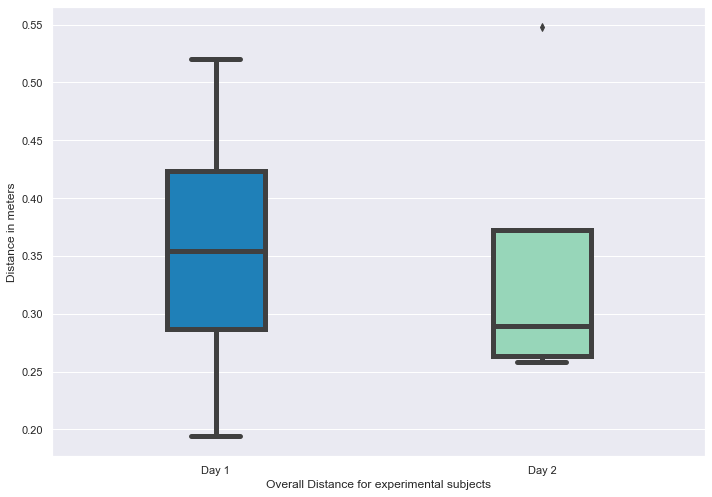

0.28965000000003016

In [13]:
mediandist_day1_expseries = pd.Series(np.array(exp1_dist_median)*1000, name="Day 1")

mediandist_day2_expseries = pd.Series(np.array(exp2_dist_median)*1000, name="Day 2")

mediandistframe_4_exp = pd.concat([mediandist_day1_expseries, mediandist_day2_expseries], axis = 1)

sns.set(rc={'figure.figsize':(11.7,8.27)})

plt.axes(xlabel="Overall Distance for experimental subjects", ylabel="Distance in meters")

sns.boxplot(data=mediandistframe_4_exp, palette="YlGnBu_r", saturation=1, linewidth=5, width=0.3)

plt.savefig("Exp1 vs exp2 dist.png")

plt.show()

np.median(np.array(exp2_dist_median)*1000)

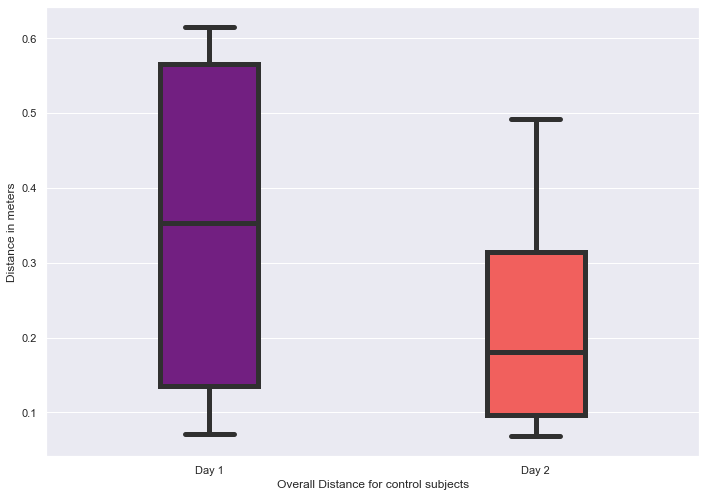

In [14]:
mediandist_day1_conseries = pd.Series(np.array(con1_dist_median)*1000, name= "Day 1")

mediandist_day2_conseries = pd.Series(np.array(con2_dist_median)*1000, name= "Day 2")

mediandistframe_4_con = pd.concat([mediandist_day1_conseries, mediandist_day2_conseries], axis = 1)

sns.set(rc={'figure.figsize':(11.7,8.27)})

plt.axes(xlabel="Overall Distance for control subjects", ylabel="Distance in meters")

sns.boxplot(data=mediandistframe_4_con, palette="magma", saturation=1, linewidth=5, width=0.3)

plt.savefig("Con1 vs con2 dist.png")

plt.show()

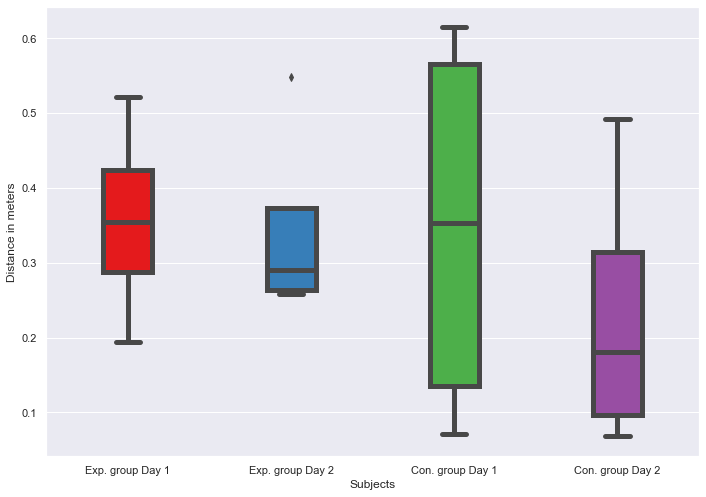

In [19]:
exp_median1 = pd.Series(np.array(exp1_dist_median)*1000, name="Exp. group Day 1")

exp_median2 = pd.Series(np.array(exp2_dist_median)*1000, name="Exp. group Day 2")

con_median1 = pd.Series(np.array(con1_dist_median)*1000, name="Con. group Day 1")

con_median2 = pd.Series(np.array(con2_dist_median)*1000, name="Con. group Day 2")

mediandistanceframe = pd.concat([exp_median1, exp_median2, con_median1, con_median2], axis = 1)

mediandistanceframe

sns.set(rc={'figure.figsize':(11.7,8.27)})

plt.axes(xlabel="Subjects", ylabel="Distance in meters")

sns.boxplot(data=mediandistanceframe, palette="Set1", saturation=1, linewidth=5, width=0.3)

plt.savefig("distance_median_boxplots.png")

plt.show()


In [28]:
#calculated in the speed script
success_rate = {'exp1_1': 46.53846153846154, 'exp1_2': 49.6, 'exp2_1': 48.75, 'exp2_2': 57.599999999999994,
 'exp3_1': 72.4, 'exp3_2': 63.6, 'exp4_1': 51.92307692307693, 'exp4_2': 61.2, 'con5_1': 27.692307692307693,
 'con5_2': 31.0, 'con6_1': 67.08, 'con6_2': 41.04, 'con7_1': 28.958333333333336, 'con7_2': 33.4, 'con8_1': 23.2577233,
 'con8_2': 30.4}

def success_rate_lists():
    
    exp_success = []
    con_success = []
    
    for k, v in success_rate.items():
        n_v = v/1
        success_rate[k] = n_v

    for k, v in success_rate.items():
        if k[:3] == 'exp':
            exp_success.append(v)
        
        else:
            con_success.append(v)
    
    exp_success_1 = exp_success[::2]
    exp_success_2 = exp_success[1::2]
    
    con_success_1 = con_success[::2]
    con_success_2 = con_success[1::2]
    
    overall_success_1 = exp_success_1 + con_success_1
    overall_success_2 = exp_success_2 + con_success_2
    
    exp_success_all = exp_success_1 + exp_success_2
    con_success_all = con_success_1 + con_success_2
    
    return overall_success_1, overall_success_2, exp_success_all, con_success_all

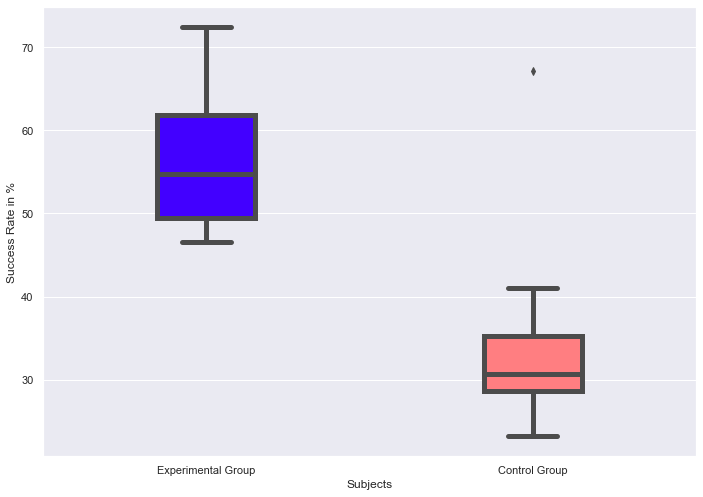

MannwhitneyuResult(statistic=7.0, pvalue=0.005040846941929832)

In [30]:
exp_group = success_rate_lists()[-2]
con_group = success_rate_lists()[-1]

sc_exp = pd.Series(exp_group, name= "Experimental Group")
sc_con = pd.Series(con_group, name= "Control Group")

df_sc = pd.concat([sc_exp, sc_con], axis = 1)

sns.set(rc={'figure.figsize':(11.7,8.27)})

plt.axes(xlabel="Subjects", ylabel="Success Rate in %")

sns.boxplot(data=df_sc, palette="gnuplot2", saturation=1, linewidth=5, width=0.3)

plt.savefig("succesrate.png")

plt.show()

sp.stats.mannwhitneyu(exp_group, con_group)
#sp.stats.shapiro(con_group) exp not normally distributed

In [ ]:
# linear progression of arm movements


pathlist = ["ArmConGroup\\Anna S\\Day 1\\log_arms.csv", "ArmConGroup\\Anna S\\Day 2\\log_arms.csv",
            "ArmConGroup\\Emily\\Day 1\\log_arms.csv", "ArmConGroup\\Emily\\Day 2\\log_arms.csv",
            "ArmConGroup\\Joseba\\Day 1\\log_arms.csv", "ArmConGroup\\Joseba\\Day 2\\log_arms.csv",
            "ArmConGroup\\Yao\\Day 1\\log_arms.csv", "ArmConGroup\\Yao\\Day 2\\log_arms.csv",             
            "ArmExpGroup\\Anna B\\Day 1\\log_arms.csv", "ArmExpGroup\\Anna B\\Day 2\\log_arms.csv",
            "ArmExpGroup\\Anna G\\Day 1\\log_arms.csv", "ArmExpGroup\\Anna G\\Day 2\\log_arms.csv",
            "ArmExpGroup\\Dimi\\Day 1\\log_arms.csv", "ArmExpGroup\\Dimi\\Day 2\\log_arms.csv",
            "ArmExpGroup\\Natasha\\Day 1\\log_arms.csv", "ArmExpGroup\\Natasha\\Day 2\log_arms.csv"]  


def progression(pathlist):
    progr_dict = {}
    for file in pathlist:
        name = get_name(file)[0]
        day = get_name(file)[1]
        nameday = (subjectdictplots[name], day)
        logarms = pd.read_csv(arm_logs_path + file, header=None, index_col=False)
        arm_movements, timer = np.array(logarms[0]), np.array(logarms[1])
        
           
        #progr_data = tuple(map(lambda *l:l, arm_movements, timer))
        
        progr_data = np.absolute(arm_movements), timer
   
        
        progr_dict[nameday] = progr_data
        
    return progr_dict

overall_prog = progression(pathlist)


#overall_prog.keys()

#return plt.plot(arm_movements, timer, label = "Left Wrist")

In [ ]:
con1_day1 = overall_prog.get(('Con1', 'Day 1'))
con1_day2 = overall_prog.get(('Con1', 'Day 2'))
con2_day1 = overall_prog.get(('Con2', 'Day 1'))
con2_day2 = overall_prog.get(('Con2', 'Day 2'))
con3_day1 = overall_prog.get(('Con3', 'Day 1'))
con3_day2 = overall_prog.get(('Con3', 'Day 2'))
con4_day1 = overall_prog.get(('Con4', 'Day 1'))
con4_day2 = overall_prog.get(('Con4', 'Day 2'))

exp1_day1 = overall_prog.get(('Exp1', 'Day 1'))
exp1_day2 = overall_prog.get(('Exp1', 'Day 2'))
exp2_day1 = overall_prog.get(('Exp2', 'Day 1'))
exp2_day2 = overall_prog.get(('Exp2', 'Day 2'))
exp3_day1 = overall_prog.get(('Exp3', 'Day 1')) 
exp3_day2 = overall_prog.get(('Exp3', 'Day 2'))
exp4_day1 = overall_prog.get(('Exp4', 'Day 1'))
exp4_day2 = overall_prog.get(('Exp4', 'Day 2'))

def plot_movements(subject):
    
    arm_movements, timer = subject[0], subject[1]
    
    sns.set(rc={'figure.figsize':(6.4, 4.8)})  # does it have to be with set
    
    plt.title('Control group - Subject 1 Day 1')
    plt.xlabel("Time in seconds") 
    plt.ylabel("Upper limb's position")
    plt.plot(timer, arm_movements)
    plt.savefig("Movement progression over time Subject 1 Day 1.png")
    plt.show()
    

plot_movements(exp2_day2)



In [ ]:

'''
Current research seems to favor dosage over method, however this may be dismissing further studies into methodologies that 
could be further ironed out to supercede traditional therapy. 
'''

#martina's and belen's possible counterargument

'''

'''

In [ ]:
#One possible conclusion
'''
The study looks into brain activity during rhythm entrainment to possibly better existing rehabilitation protocols.
This, however, solely touches upon motor learning and not other afflictions resulting after a stroke e.g. 
'''

#rethink this statement. Based on research SPECS, overtraining may actually be an issue and experiment seems to corroborate
#said thought

'''
Hemiplegia, impairment of coordination or
balance, spasticity, apraxia, neglect, behavioral problems, neurogenic bladder and bowel, deconditioning,
pressure sore, depression, and pain are all common
conditions after stroke. All of these conditions should
be considered when treating post-stroke patients, and
same principle in motor training should be applied
to neurorehabilitation of these impairments. 
'''